# SPECT simulation 

Analysis after the simulation :
- in folder: spect/
- macro: main.mac

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
import numpy as np
from ipywidgets import interact
import os
from pathlib import Path
import uproot

In [11]:
# The following command display the current working directory (where jupyter has been launched)
cwd = os.getcwd()
print('The Current Working Directory (CWD) is: \n', cwd)
folder = Path('./results.hvyn3r_5')
if (not folder.is_dir()):
    print('ERROR: {} is not a folder.'.format(folder))
filename = os.path.join(folder, 'spect.root')
f = uproot.open(filename)

The Current Working Directory (CWD) is: 
 /home/jovyan/work/spect


In [12]:
print("List of keys: \n", f.keys())

List of keys: 
 [b'latest_event_ID;1', b'total_nb_primaries;1', b'Hits;1', b'SinglesAdder;1', b'SinglesBlurring;1', b'Singles;1', b'SinglesThresholder;1', b'SinglesUpholder;1', b'scatter;1', b'peak171;1', b'peak245;1']


In [13]:
hits = f[b'Hits']
print('Number of hits:', len(hits))
print('Hits: ')
for i in hits.keys():
    print(i, ' ', end='')

Number of hits: 53874
Hits: 
b'PDGEncoding'  b'trackID'  b'parentID'  b'trackLocalTime'  b'time'  b'edep'  b'stepLength'  b'trackLength'  b'posX'  b'posY'  b'posZ'  b'localPosX'  b'localPosY'  b'localPosZ'  b'momDirX'  b'momDirY'  b'momDirZ'  b'headID'  b'crystalID'  b'pixelID'  b'unused3ID'  b'unused4ID'  b'unused5ID'  b'photonID'  b'nPhantomCompton'  b'nCrystalCompton'  b'nPhantomRayleigh'  b'nCrystalRayleigh'  b'primaryID'  b'sourcePosX'  b'sourcePosY'  b'sourcePosZ'  b'sourceID'  b'eventID'  b'runID'  b'axialPos'  b'rotationAngle'  b'volumeID'  b'processName'  b'comptVolName'  b'RayleighVolName'  

# Plot 1: position of hits, hits times (global & local)

Text(0.5, 0, 'Time in ns')

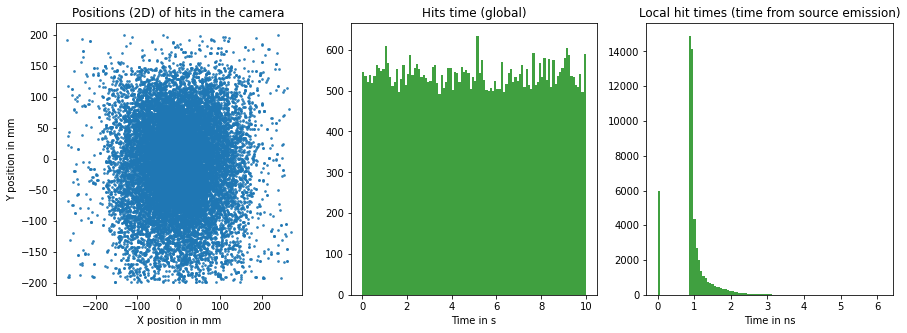

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1
hits_u = hits.arrays()[b'posX']
hits_v = hits.arrays()[b'posZ']
ax[0].scatter(hits_u, hits_v, alpha=0.8, s=3)
ax[0].set_title('Positions (2D) of hits in the camera')
ax[0].set_xlabel('X position in mm')
ax[0].set_ylabel('Y position in mm')
#ax[0].set_aspect('equal')

# Plot 2
times = hits.arrays()[b'time']
n, bins, patches = ax[1].hist(times, 100, facecolor='green', alpha=0.75)
ax[1].set_title('Hits time (global)')
ax[1].set_xlabel('Time in s')

# Plot 3
times = hits.arrays()[b'trackLocalTime']*1e9
n, bins, patches = ax[2].hist(times, 100, facecolor='green', alpha=0.75)
ax[2].set_title('Local hit times (time from source emission)')
ax[2].set_xlabel('Time in ns')

# Plot 2: edep, step length and track length

Text(0.5, 0, 'Length in mm')

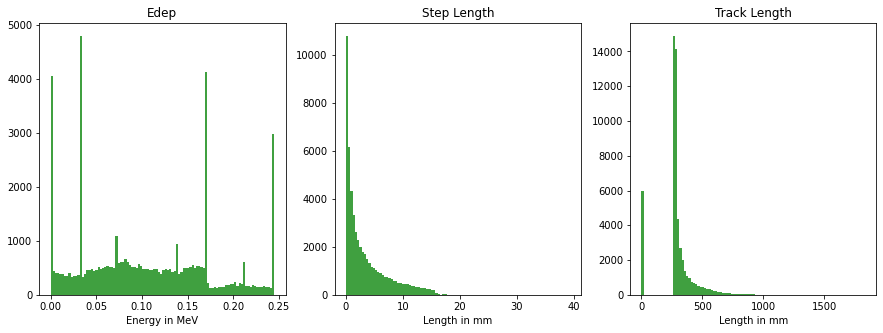

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1
edep = hits.arrays()[b'edep']
n, bins, patches = ax[0].hist(edep, 100, facecolor='green', alpha=0.75)
ax[0].set_title('Edep')
ax[0].set_xlabel('Energy in MeV')

# Plot 1
stepLength = hits.arrays()[b'stepLength']
n, bins, patches = ax[1].hist(stepLength, 100, facecolor='green', alpha=0.75)
ax[1].set_title('Step Length')
ax[1].set_xlabel('Length in mm')

# Plot 2
trackLength = hits.arrays()[b'trackLength']
n, bins, patches = ax[2].hist(trackLength, 100, facecolor='green', alpha=0.75)
ax[2].set_title('Track Length')
ax[2].set_xlabel('Length in mm')

In [16]:
singles = f[b'Singles']
print('Number of Singles :', len(singles))
print('Singles: ')
for i in singles.keys():
    print(i, ' ', end='')

Number of Singles : 36183
Singles: 
b'runID'  b'eventID'  b'sourceID'  b'sourcePosX'  b'sourcePosY'  b'sourcePosZ'  b'time'  b'energy'  b'globalPosX'  b'globalPosY'  b'globalPosZ'  b'headID'  b'crystalID'  b'pixelID'  b'unused3ID'  b'unused4ID'  b'unused5ID'  b'comptonPhantom'  b'comptonCrystal'  b'RayleighPhantom'  b'RayleighCrystal'  b'axialPos'  b'rotationAngle'  b'comptVolName'  b'RayleighVolName'  

# Plot 3: energy  of the singles

Text(0.5, 0, 'Energy in keV')

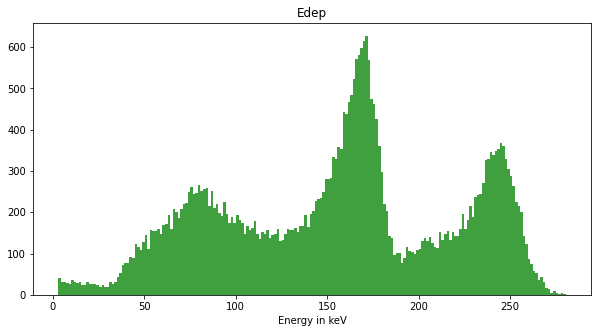

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
energy = singles.arrays()[b'energy']/0.001
n, bins, patches = ax.hist(energy, 200, facecolor='green', alpha=0.75)
ax.set_title('Edep')
ax.set_xlabel('Energy in keV')